In [4]:
import pandas as pd

# Load the CSV file
tweets_df = pd.read_csv("twitter_dataset.csv")

# Display the first few rows of the dataframe
tweets_df.head(20)


,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21
5,6,ramirezmikayla,Cell without report weight. Could father chang...,22,75,2023-03-30 09:56:07
6,7,fieldsbrian,Receive difference their. Responsibility build...,12,43,2023-01-02 03:15:54
7,8,jgood,Five sort guy why politics than. Somebody pret...,0,12,2023-01-22 20:08:31
8,9,turneredgar,Reveal table state view manager she. Fly yeah ...,15,26,2023-03-24 15:17:03
9,10,audreymooney,List allow family rather continue. Agency mess...,97,28,2023-02-01 20:32:07


In [5]:
# shape of the dataframe
tweets_df.shape

(10000, 6)

In [6]:

# Rename columns if necessary (example: 'content' -> 'text')
tweets_df.rename(columns={'Text': 'text', 'date': 'timestamp'}, inplace=True)

In [7]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'\W+', ' ', text)     # Remove special characters
    text = text.lower()                  # Convert to lowercase
    return text

# Apply the cleaning function to the tweets
tweets_df['clean_text'] = tweets_df['text'].apply(clean_text)


In [8]:
!pip install TextBlob

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment function to the cleaned tweets
tweets_df['sentiment'] = tweets_df['clean_text'].apply(get_sentiment)


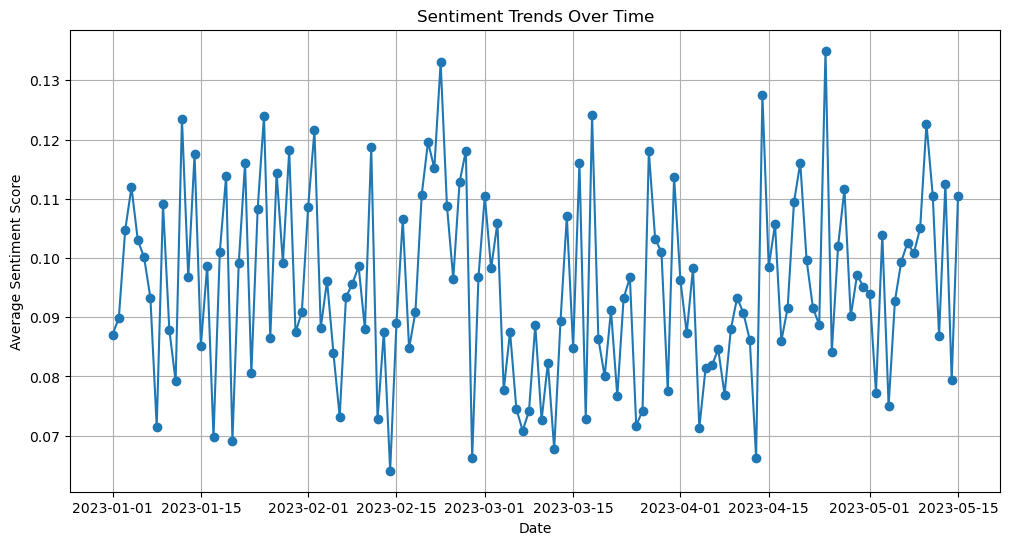

In [10]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime
tweets_df['timestamp'] = pd.to_datetime(tweets_df['Timestamp'])

# Group by date and calculate mean sentiment
sentiment_trends = tweets_df.set_index('timestamp').resample('D')['sentiment'].mean()

# Plot the sentiment trends
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trends, marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


In [11]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the classification function to the sentiment scores
tweets_df['sentiment_category'] = tweets_df['sentiment'].apply(classify_sentiment)

# Print a few rows to check the sentiment categories
print(tweets_df[['clean_text', 'sentiment', 'sentiment_category']].head())


                                          clean_text  sentiment  \
0  party least receive say or single prevent prev...   0.115714   
1  hotel still congress may member staff media dr...   0.308333   
2  nice be her debate industry that year film whe...   0.220000   
3  laugh explain situation career occur serious f...   0.054762   
4  involve sense former often approach government...   0.033333   

  sentiment_category  
0           positive  
1           positive  
2           positive  
3           positive  
4           positive  


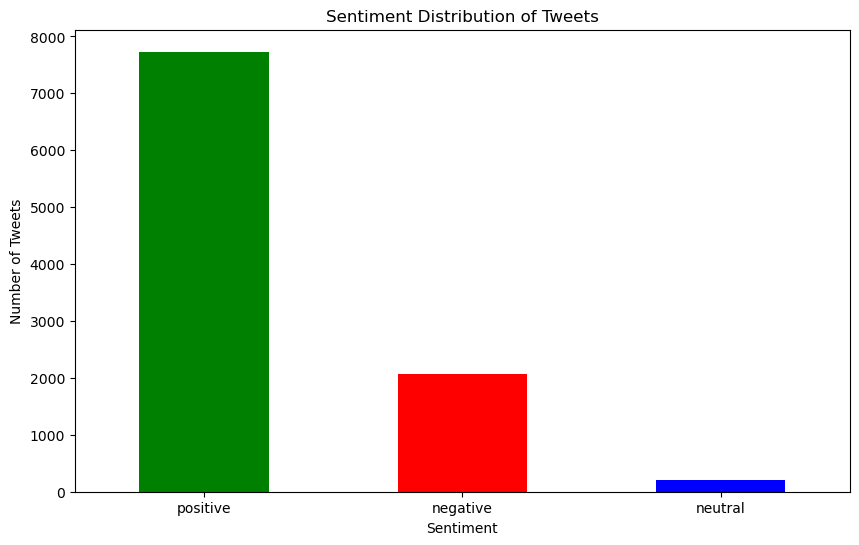

In [12]:
import matplotlib.pyplot as plt

# Count the number of tweets in each sentiment category
sentiment_counts = tweets_df['sentiment_category'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()
